#Data Analysis#

**Import all the libraries we need**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import display

**Import Data**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
schedules_df = pd.read_excel('/content/drive/MyDrive/Synthesis Project I/Data/Schedules.xlsx')
data_df = pd.read_excel('/content/drive/MyDrive/Synthesis Project I/Data/Data.xlsx')
clients_df = pd.read_excel('/content/drive/MyDrive/Synthesis Project I/Data/Clients.xlsx')
transl_cost_pairs_df = pd.read_excel('/content/drive/MyDrive/Synthesis Project I/Data/TranslatorsCost+Pairs.xlsx')




 **Data Overview**

Let's have a first look at the data and some basic information

In [5]:
print("\nData Info:")
data_df.info()
data_df.describe()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554029 entries, 0 to 554028
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   PROJECT_ID                   554029 non-null  object        
 1   PM                           554029 non-null  object        
 2   TASK_ID                      554029 non-null  int64         
 3   START                        554029 non-null  object        
 4   END                          554029 non-null  datetime64[ns]
 5   TASK_TYPE                    554029 non-null  object        
 6   SOURCE_LANG                  554029 non-null  object        
 7   TARGET_LANG                  554029 non-null  object        
 8   TRANSLATOR                   554029 non-null  object        
 9   ASSIGNED                     554029 non-null  datetime64[ns]
 10  READY                        554029 non-null  datetime64[ns]
 11  WORKING       

,TASK_ID,END,ASSIGNED,READY,WORKING,DELIVERED,RECEIVED,CLOSE,HOURS,HOURLY_RATE,COST,QUALITY_EVALUATION
count,5.540290e+05,554029,554029,554029,554029,554029,554029,554029,554029.000000,554029.000000,554029.000000,554029.000000
mean,1.067535e+07,2018-03-22 11:23:06.568599808,2018-03-19 20:40:49.710924544,2018-03-20 09:01:30.532499456,2018-03-21 06:02:55.127392768,2018-03-22 02:34:53.842454016,2018-03-22 10:09:04.660346368,2018-03-22 12:53:49.115781120,2.342250,16.373515,37.883495,7.064479
min,1.004828e+07,2009-11-06 19:00:00,2010-01-04 09:35:57,2010-01-04 09:37:06,2010-01-04 10:11:55,2010-01-04 10:42:22,2010-01-04 14:08:41,2010-01-04 14:08:41,0.000000,8.000000,0.000000,0.000000
25%,1.038542e+07,2015-09-17 09:00:00,2015-09-15 09:58:47,2015-09-15 11:41:40,2015-09-16 08:05:51,2015-09-16 17:09:40,2015-09-17 07:52:35,2015-09-17 12:06:00,0.110000,13.000000,1.820000,6.000000
50%,1.068016e+07,2018-11-13 21:00:00,2018-11-12 09:44:32,2018-11-12 10:27:24,2018-11-13 10:26:06,2018-11-13 16:15:54,2018-11-13 20:09:24,2018-11-14 00:44:25,0.490000,15.000000,7.310000,7.000000
75%,1.096631e+07,2021-02-09 10:28:00,2021-02-05 11:41:04,2021-02-08 09:45:19,2021-02-08 15:55:07,2021-02-08 19:11:55,2021-02-09 08:04:51,2021-02-09 08:40:31,1.600000,17.000000,25.610000,8.000000
max,1.124191e+07,2023-12-30 16:00:00,2022-12-31 19:14:44,2023-02-10 13:53:38,2023-02-28 09:45:32,2023-02-28 09:45:34,2023-02-28 15:57:36,2023-02-28 15:57:38,324.830000,62.000000,12275.600000,10.000000
std,3.299086e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.743276,5.190844,121.788621,1.474791


In [6]:
print("\nSchedules Info:")
schedules_df.info()
schedules_df.describe()


Schedules Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NAME    871 non-null    object
 1   START   871 non-null    object
 2   END     871 non-null    object
 3   MON     871 non-null    int64 
 4   TUES    871 non-null    int64 
 5   WED     871 non-null    int64 
 6   THURS   871 non-null    int64 
 7   FRI     871 non-null    int64 
 8   SAT     871 non-null    int64 
 9   SUN     871 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 68.2+ KB


,MON,TUES,WED,THURS,FRI,SAT,SUN
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,0.795637,0.787600,0.785304,0.784156,0.799082,0.469575,0.475316
std,0.403467,0.409241,0.410847,0.411643,0.400917,0.499360,0.499677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print("\nClients Info:")
clients_df.info()
clients_df.describe()


Clients Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLIENT_NAME           2567 non-null   object 
 1   SELLING_HOURLY_PRICE  2567 non-null   int64  
 2   MIN_QUALITY           2567 non-null   float64
 3   WILDCARD              2567 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 80.3+ KB


,SELLING_HOURLY_PRICE,MIN_QUALITY
count,2567.000000,2567.000000
mean,26.172575,5.567589
std,6.904328,3.174886
min,20.000000,0.000000
25%,20.000000,7.000000
50%,25.000000,7.000000
75%,25.000000,7.500000
max,90.000000,8.000000


In [8]:
print("\nTranslators Cost + Pairs Info:")
transl_cost_pairs_df.info()
transl_cost_pairs_df.describe()


Translators Cost + Pairs Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TRANSLATOR   3794 non-null   object
 1   SOURCE_LANG  3794 non-null   object
 2   TARGET_LANG  3794 non-null   object
 3   HOURLY_RATE  3794 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 118.7+ KB


,HOURLY_RATE
count,3794.000000
mean,20.606747
std,8.422430
min,8.000000
25%,15.000000
50%,18.000000
75%,24.000000
max,60.000000


In [9]:
data_df.head()

,PROJECT_ID,PM,TASK_ID,START,END,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,ASSIGNED,...,CLOSE,HOURS,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY
0,212331,PMT,10048285,2013-11-01 13:13:00,2013-10-31 19:00:00,Miscellaneous,Catalan,Catalan,Victor,2013-10-31 13:14:35,...,2013-10-31 13:18:34,0.00,13,0.00,5,SunTech,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
1,211096,PMT,10048285,2012-10-26 17:24:00,2012-11-30 19:00:00,Miscellaneous,English,Galician,Severino,2012-10-26 17:25:26,...,2012-11-30 13:38:12,3.10,17,52.70,8,NexisOne,Technology Hardware,Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
2,214198,KMT,10048285,2015-09-09 17:29:00,2015-09-10 11:00:00,Engineering,English,Spanish (Iberian),Jeronimo,2015-09-09 17:31:52,...,2015-09-10 17:33:07,1.50,11,16.50,9,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities
3,213494,KMT,10048285,2014-11-26 10:36:00,2014-11-26 15:30:00,Engineering,English,Portuguese (Brazil),Estela,2014-11-26 16:34:23,...,2014-11-26 17:51:48,0.25,17,4.25,7,Coastal Cottage,Consumer Discretionary,Consumer Services,"Hotels, Restaurants & Leisure","Hotels, Resorts & Cruise Lines"
4,212331,PMT,10048286,2013-11-01 13:13:00,2013-10-31 19:00:00,Management,Catalan,Spanish (Global),Maria Alexandra,2013-10-31 13:14:35,...,2013-10-31 13:18:08,0.00,20,0.00,7,SunTech,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"


In [10]:
schedules_df.head()

,NAME,START,END,MON,TUES,WED,THURS,FRI,SAT,SUN
0,Aaron,09:00:00,19:00:00,1,1,1,1,1,0,0
1,Abdon,10:00:00,20:00:00,1,1,1,1,1,1,1
2,Abdon Isaias,09:00:00,19:00:00,1,1,1,1,1,1,1
3,Abdon Luis,04:00:00,14:00:00,0,0,0,0,1,0,0
4,Abel Irene,07:00:00,17:00:00,0,0,0,1,0,0,0


In [11]:
clients_df.head()

,CLIENT_NAME,SELLING_HOURLY_PRICE,MIN_QUALITY,WILDCARD
0,Accesstra,25,7.0,Quality
1,CureEquip Co.,20,7.5,Price
2,CyberWise,20,8.0,Quality
3,DataDriven Dynamics,25,0.0,Deadline
4,DataWise,20,8.0,Price


In [12]:
transl_cost_pairs_df.head()

,TRANSLATOR,SOURCE_LANG,TARGET_LANG,HOURLY_RATE
0,Aaron,English,Spanish (Iberian),19
1,Abdon Isaias,English,Catalan,16
2,Abdon Isaias,English,English,24
3,Abdon Isaias,English,Spanish (Global),13
4,Abdon Isaias,English,Spanish (Iberian),17


In [13]:
data_df.dtypes

,0
PROJECT_ID,object
PM,object
TASK_ID,int64
START,object
END,datetime64[ns]
TASK_TYPE,object
SOURCE_LANG,object
TARGET_LANG,object
TRANSLATOR,object
ASSIGNED,datetime64[ns]


**Data cleaning**

In [14]:
#once
#data_df['HOURS'] = data_df['HOURS'].str.replace(',', '.').astype(float)

In [15]:
# Missing Values Analysis
missing_values = data_df.isnull().sum()
print("Missing Values:\n", missing_values)

missing_values = schedules_df.isnull().sum()
print( "\n",missing_values)

missing_values = clients_df.isnull().sum()
print("\n", missing_values)

missing_values = transl_cost_pairs_df.isnull().sum()
print("\n", missing_values)

Missing Values:
 PROJECT_ID                     0
PM                             0
TASK_ID                        0
START                          0
END                            0
TASK_TYPE                      0
SOURCE_LANG                    0
TARGET_LANG                    0
TRANSLATOR                     0
ASSIGNED                       0
READY                          0
WORKING                        0
DELIVERED                      0
RECEIVED                       0
CLOSE                          0
HOURS                          0
HOURLY_RATE                    0
COST                           0
QUALITY_EVALUATION             0
MANUFACTURER                   5
MANUFACTURER_SECTOR            5
MANUFACTURER_INDUSTRY_GROUP    5
MANUFACTURER_INDUSTRY          5
MANUFACTURER_SUBINDUSTRY       5
dtype: int64

 NAME     0
START    0
END      0
MON      0
TUES     0
WED      0
THURS    0
FRI      0
SAT      0
SUN      0
dtype: int64

 CLIENT_NAME             0
SELLING_HOURLY_PRICE    0

In [43]:
#Convert into datetime objects
datetime_columns = ["START", "END", "ASSIGNED", "READY", "WORKING", "DELIVERED", "RECEIVED", "CLOSE"]

# Convert each column to datetime format
for col in datetime_columns:
    if col in data_df.columns:
        data_df[col] = pd.to_datetime(data_df[col], errors='coerce')


**Visualisation**

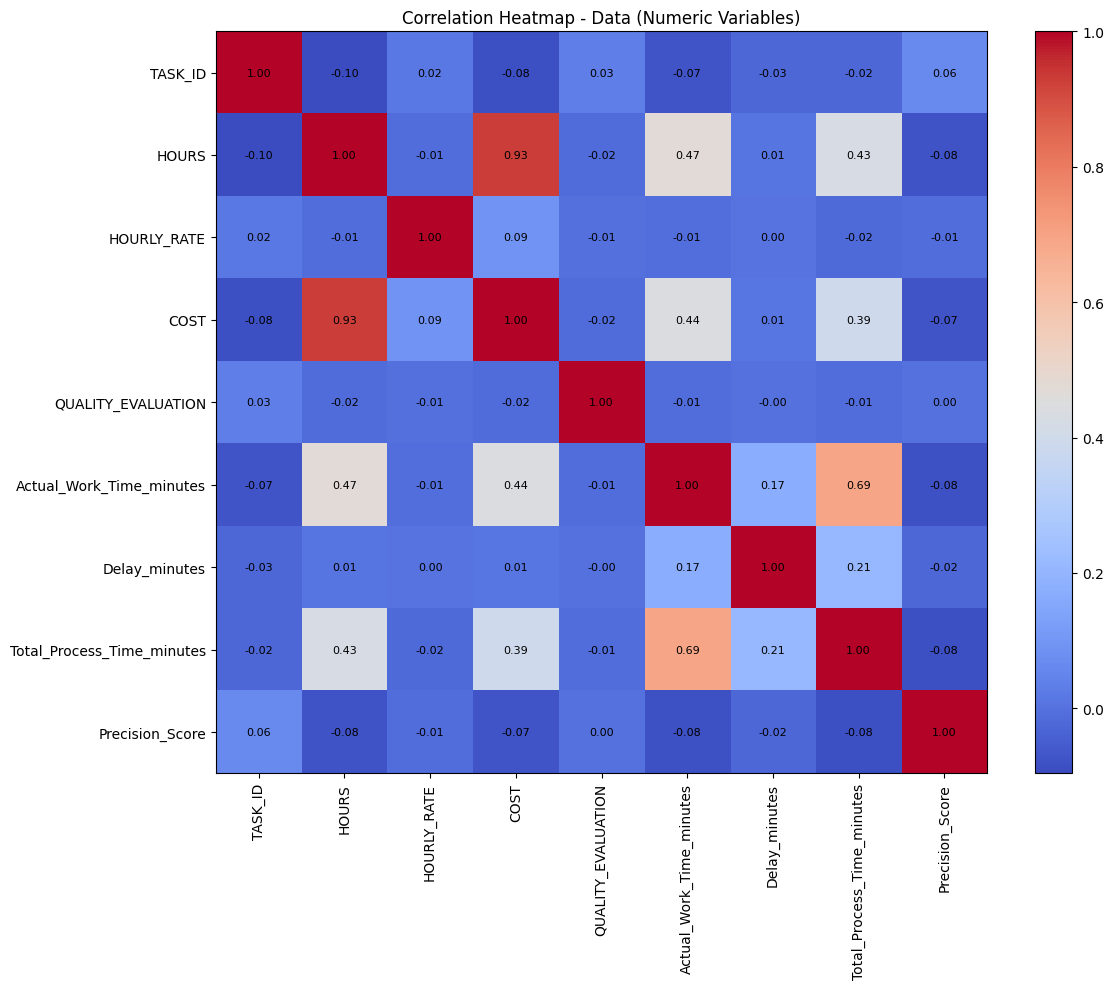

In [30]:

# List of datasets
datasets = {
  "Data": data_df,
}

# Generate correlation heatmaps for each dataset
for name, df in datasets.items():
  # Select only numeric columns
  numeric_df = df.select_dtypes(include=[np.number])

  if numeric_df.empty:
      print(f"Skipping {name} dataset as it has no numeric columns.")
      continue

  # Compute correlation matrix
  corr_full = numeric_df.corr()

  # Plot heatmap
  plt.figure(figsize=(12, 10))
  plt.imshow(corr_full, cmap='coolwarm', interpolation='none', aspect='auto')
  plt.colorbar()
  plt.xticks(range(len(corr_full.columns)), corr_full.columns, rotation=90)
  plt.yticks(range(len(corr_full.index)), corr_full.index)
  plt.title(f"Correlation Heatmap - {name} (Numeric Variables)")

  # Annotate heatmap with correlation values
  for (i, j), val in np.ndenumerate(corr_full):
      plt.text(j, i, f"{val:.2f}", ha="center", va="center", color="black", fontsize=8)

  plt.tight_layout()
  plt.show()



**Feature Engineering**

In [21]:
# Precision Score: 1/(1 + |Delay_minutes|)
if "Delay_minutes" in data_df.columns:
    data_df["Precision_Score"] = 1 / (1 + data_df["Delay_minutes"].abs())
    print("Precision_Score calculated.")
    print(data_df[["TASK_ID", "Delay_minutes", "Precision_Score"]].head())
else:
    print("Delay_minutes column is missing.")


Precision_Score calculated.
    TASK_ID  Delay_minutes  Precision_Score
0  10048285            NaN              NaN
1  10048285            NaN              NaN
2  10048285     342.350000         0.002912
3  10048285     140.116667         0.007086
4  10048286            NaN              NaN


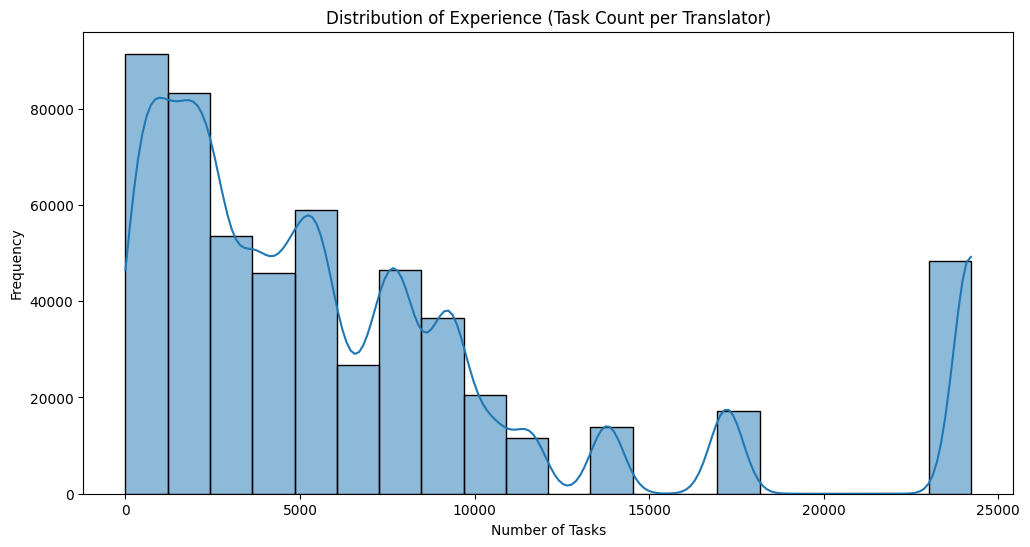

<ipython-input-31-e669e94f2a64>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_experienced.values, y=top_experienced.index, palette='viridis')


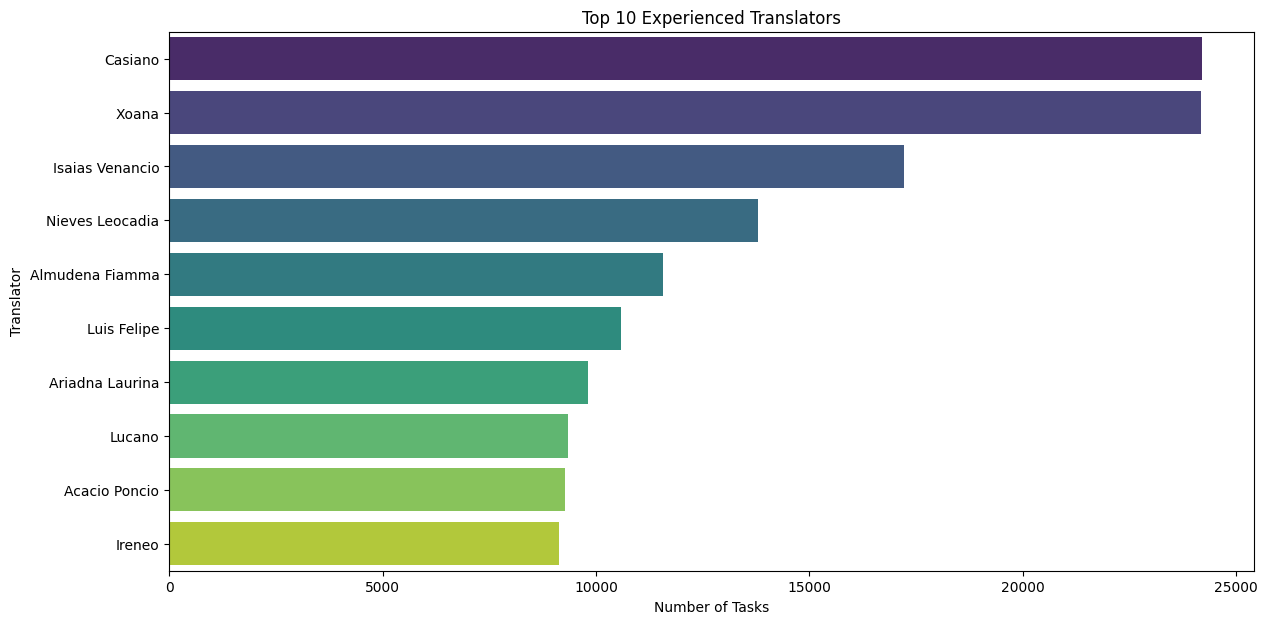

In [31]:

# Create EXPERIENCE variable: Task count per translator
data_df['EXPERIENCE'] = data_df.groupby('TRANSLATOR')['TRANSLATOR'].transform('count')

# Histogram of experience distribution
plt.figure(figsize=(12, 6))
sns.histplot(data_df['EXPERIENCE'], bins=20, kde=True)
plt.title('Distribution of Experience (Task Count per Translator)')
plt.xlabel('Number of Tasks')
plt.ylabel('Frequency')
plt.show()

# Bar plot of top 10 experienced translators
top_experienced = data_df.groupby('TRANSLATOR')['EXPERIENCE'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_experienced.values, y=top_experienced.index, palette='viridis')
plt.title('Top 10 Experienced Translators')
plt.xlabel('Number of Tasks')
plt.ylabel('Translator')
plt.show()


In [46]:


# Function to format minutes into HH:MM format
def format_time(minutes):
    """
    Converts minutes into HH:MM format.
    Returns None for missing or negative values.
    """
    if pd.isna(minutes) or minutes is None or minutes < 0:
        return None  # Ignore invalid values
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return f"{hours:02d}:{mins:02d}"  # Formats as HH:MM

# Create new columns

# Work Duration (Actual Work Time)
if {"WORKING", "DELIVERED"}.issubset(data_df.columns):
    data_df["Actual_Work_Time_minutes"] = (data_df["DELIVERED"] - data_df["WORKING"]).dt.total_seconds() / 60
    data_df["Actual_Work_Time"] = data_df["Actual_Work_Time_minutes"].apply(format_time)

# Delay Time (Only if DELIVERED is later than END)
if {"DELIVERED", "END"}.issubset(data_df.columns):
    data_df["Delay_minutes"] = (data_df["DELIVERED"] - data_df["END"]).dt.total_seconds() / 60
    data_df["Delay_minutes"] = data_df["Delay_minutes"].apply(lambda x: x if x > 0 else None)  # Keep only positive delays
    data_df["Delay"] = data_df["Delay_minutes"].apply(format_time)

# Process Time (Total Time from Assignment to Close)
if {"ASSIGNED", "CLOSE"}.issubset(data_df.columns):
    data_df["Total_Process_Time_minutes"] = (data_df["CLOSE"] - data_df["ASSIGNED"]).dt.total_seconds() / 60
    data_df["Total_Process_Time"] = data_df["Total_Process_Time_minutes"].apply(format_time)

# Select relevant columns dynamically (only include if they exist)
cols = ["TASK_ID"]
if "Actual_Work_Time" in data_df.columns:
    cols.append("Actual_Work_Time")
if "Total_Process_Time" in data_df.columns:
    cols.append("Total_Process_Time")
if "Delay" in data_df.columns:
    cols.append("Delay")  # Include Delay only if it exists

# Display new metrics as a table along with the first few rows
print("\nUpdated Data with New Columns:")
display(data_df[cols].head())



Updated Data with New Columns:


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,TASK_ID,Actual_Work_Time,Total_Process_Time,Delay
0,10048285,00:00,00:03,None
1,10048285,743:01,836:12,None
2,10048285,23:06,24:01,05:42
3,10048285,01:15,01:17,02:20
4,10048286,00:00,00:03,None


**Let's look for potential "vacations"**

In [16]:
# Display the first 5 rows where there are missing values in any column
missing_rows = data_df[data_df.isnull().any(axis=1)]
display(missing_rows.head(5))

,PROJECT_ID,PM,TASK_ID,START,END,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,ASSIGNED,...,CLOSE,HOURS,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY
260009,217144,KMT,10643178,2018-07-17 15:26:00,2018-07-18 16:00:00,Translation,Catalan,Spanish (Iberian),Abelardo,2018-07-17 15:36:54,...,2018-07-18 12:04:29,1.46,19,27.74,7,NaN,NaN,NaN,NaN,NaN
260374,217144,KMT,10643944,2018-07-19 12:46:00,2018-07-23 13:30:00,Translation,Spanish (Iberian),English,John,2018-07-19 14:36:41,...,2018-07-23 13:20:01,2.40,35,84.00,5,NaN,NaN,NaN,NaN,NaN
260375,217144,KMT,10643948,2018-07-19 12:47:00,2018-08-06 19:00:00,Translation,Spanish (Iberian),French,Emil,2018-07-19 14:40:39,...,2018-08-07 12:36:50,69.23,26,1799.98,5,NaN,NaN,NaN,NaN,NaN
260376,217144,KMT,10643950,2018-07-19 12:49:00,2018-08-08 12:00:00,Translation,Spanish (Iberian),German,Sabine,2018-07-19 14:41:24,...,2018-08-13 16:22:50,73.32,40,2932.80,5,NaN,NaN,NaN,NaN,NaN
260377,217144,KMT,10643951,2018-08-08 12:00:00,2018-08-14 12:00:00,ProofReading,Spanish (Global),German,Paul,2018-07-19 14:41:48,...,2018-08-21 12:45:07,23.33,60,1399.80,9,NaN,NaN,NaN,NaN,NaN


In [47]:
# Filter rows where origin language and target language are the same
same_language_rows = data_df[data_df['SOURCE_LANG'] == data_df['TARGET_LANG']]

# Count how many rows match this condition
num_same_language_rows = same_language_rows.shape[0]

# Calculate the average HOURS for these rows
average_hours = same_language_rows['HOURS'].mean()

# Display the results
print(f"Number of rows where the origin language and target language are the same: {num_same_language_rows}")
print(f"Average HOURS for these rows: {average_hours}")


Number of rows where the origin language and target language are the same: 709
Average HOURS for these rows: 3.2560648801128353


In [39]:
# Filter rows where origin language and target language are the same
same_language_rows = data_df[data_df['SOURCE_LANG'] == data_df['TARGET_LANG']]

# Display the filtered rows
display(same_language_rows)


,PROJECT_ID,PM,TASK_ID,START,END,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,ASSIGNED,...,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY,Actual_Work_Time_minutes,Actual_Work_Time,Delay_minutes,Delay,Total_Process_Time_minutes,Total_Process_Time,Precision_Score,EXPERIENCE
0,212331,PMT,10048285,2013-11-01 13:13:00,2013-10-31 19:00:00,Miscellaneous,Catalan,Catalan,Victor,2013-10-31 13:14:35,...,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",0.033333,00:00,NaN,None,3.983333,00:03,NaN,582
393,207344,BMT,10113184,2010-01-15 11:05:00,2010-01-15 11:30:00,Engineering,Catalan,Catalan,Maria Alexandra,2010-01-15 11:10:44,...,Application Software,Application Software,4690.483333,78:10,4671.366667,77:51,4690.733333,78:10,0.000214,27
853,280036,RMT,10113982,2010-01-28 16:40:00,2010-02-01 11:00:00,ProofReading,Spanish (Iberian),Spanish (Iberian),Ramiro Josafat,2010-01-29 16:41:26,...,Application Software,Application Software,31.500000,00:31,NaN,None,51.216667,00:51,NaN,4576
1045,207443,BMT,10114294,2010-02-05 10:44:00,2010-02-08 09:00:00,ProofReading,Spanish (Iberian),Spanish (Iberian),Acacio Poncio,2010-02-05 10:44:35,...,Health Care Facilities,Long-Term Care Facilities,37.916667,00:37,NaN,None,64.983333,01:04,NaN,9267
1358,280036,RMT,10114828,2010-02-16 10:56:00,2010-02-16 17:00:00,ProofReading,Spanish (Iberian),Spanish (Iberian),Marti,2010-02-16 11:14:33,...,Application Software,Application Software,68.450000,01:08,NaN,None,255.000000,04:15,NaN,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542871,220993,KMT,11210289,2022-10-28 13:42:00,2022-11-02 09:00:00,ProofReading,English,English,Samuel,2022-10-31 11:06:18,...,Leisure Products,Leisure Products,53.883333,00:53,NaN,None,2758.683333,45:58,NaN,162
545073,221234,KMT,11214550,2022-11-10 09:24:00,2022-11-11 10:00:00,ProofReading,Spanish (Iberian),Spanish (Iberian),Francisco Jose,2022-11-10 13:37:15,...,Industrial Machinery,Industrial Machinery,457.700000,07:37,NaN,None,1251.300000,20:51,NaN,909
548248,220789,PMT,11220682,2022-11-28 15:35:00,2022-11-29 13:00:00,Miscellaneous,Spanish (Iberian),Spanish (Iberian),Fortunato,2022-11-28 16:35:53,...,Industrial Machinery,Industrial Machinery,149.850000,02:29,NaN,None,1226.216667,20:26,NaN,3658
548417,220933,BMT,11220992,2022-11-29 10:23:00,2022-12-06 18:00:00,Miscellaneous,Spanish (LA),Spanish (LA),Sussana,2022-11-29 10:31:17,...,Application Software,Systems Software,8774.633333,146:14,NaN,None,10524.866667,175:24,NaN,7993


**Let's see how often a translator was assigned the same sector and subindustry**

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase figure size globally
plt.rcParams['figure.figsize'] = (14, 7)

# Check unique sectors per translator
translator_sector_counts = data_df.groupby('TRANSLATOR')['MANUFACTURER_SECTOR'].nunique()
print("\nUnique Sectors per Translator:\n", translator_sector_counts)


# Check unique subindustry per translator
translator_sector_counts = data_df.groupby('TRANSLATOR')['MANUFACTURER_SUBINDUSTRY'].nunique()
print("\nUnique Subindustry per Translator:\n", translator_sector_counts)


Unique Sectors per Translator:
 TRANSLATOR
Aaron                  2
Abdon                  3
Abdon Isaias          13
Abdon Luis             1
Abel Irene             1
                      ..
Zacarias Casio        10
Zacarias Marcelino     7
Zachary                4
Zlatan                 4
Zlatko                 1
Name: MANUFACTURER_SECTOR, Length: 871, dtype: int64

Unique Subindustry per Translator:
 TRANSLATOR
Aaron                  2
Abdon                  4
Abdon Isaias          70
Abdon Luis             1
Abel Irene             1
                      ..
Zacarias Casio        35
Zacarias Marcelino     9
Zachary                5
Zlatan                 5
Zlatko                 1
Name: MANUFACTURER_SUBINDUSTRY, Length: 871, dtype: int64
